In [1]:
print("Hello World")

Hello World


In [2]:
# Import all the things we will need
import datetime
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.data import Dataset
import matplotlib.pyplot as plt

In [3]:
# List of the words in categorical order
words = [
    'backward',
    'bed',
    'bird',
    'cat',
    'dog',
    'down',
    'eight',
    'five',
    'follow',
    'forward',
    'four',
    'go',
    'happy',
    'house',
    'learn',
    'left',
    'marvin',
    'nine',
    'no',
    'off',
    'on',
    'one',
    'right',
    'seven',
    'sheila',
    'six',
    'stop',
    'three',
    'tree',
    'two',
    'up',
    'visual',
    'wow',
    'yes',
    'zero',
    '_background',
]

In [4]:
# Load up the sprectrograms and labels
training_spectrogram = np.load('C:/Users/Arbaz Khan/Downloads/training_spectrogram.npz')
validation_spectrogram = np.load('C:/Users/Arbaz Khan/Downloads/validation_spectrogram.npz')
test_spectrogram = np.load('C:/Users/Arbaz Khan/Downloads/test_spectrogram.npz')

In [5]:
# extract the data from the files
X_train = training_spectrogram['X']
Y_train_cats = training_spectrogram['Y']
X_validate = validation_spectrogram['X']
Y_validate_cats = validation_spectrogram['Y']
X_test = test_spectrogram['X']
Y_test_cats = test_spectrogram['Y']

# get the width and height of the spectrogram "image"
IMG_WIDTH=X_train[0].shape[0]
IMG_HEIGHT=X_train[0].shape[1]

(array([1.2360e+03, 1.3380e+03, 1.3970e+03, 0.0000e+00, 1.4400e+03,
        2.8490e+03, 2.6690e+03, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 2.7540e+03, 0.0000e+00, 1.4430e+03, 0.0000e+00,
        2.7500e+03, 1.0178e+05, 2.8910e+03, 2.8170e+03, 0.0000e+00,
        0.0000e+00, 2.7760e+03, 0.0000e+00, 2.9210e+03, 1.3900e+03,
        1.9260e+03, 0.0000e+00, 2.6860e+03, 1.1680e+03, 2.7990e+03,
        0.0000e+00, 3.6000e+01, 1.4310e+03, 2.9330e+03, 0.0000e+00,
        5.4280e+03]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
        13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
        26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36.]),
 <BarContainer object of 36 artists>)

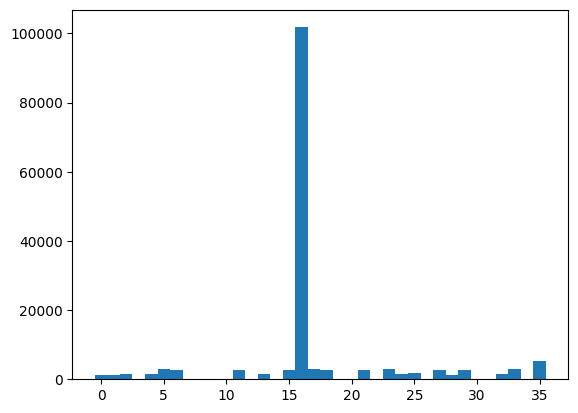

In [6]:
# plot a distribution of the words
plt.hist(Y_train_cats, bins=range(0,len(words)+1), align='left')

In [7]:
unique, counts = np.unique(Y_train_cats, return_counts=True)
print(unique, counts)
dict(zip([words[i] for i in unique], counts))

[ 0  1  2  4  5  6 11 13 15 16 17 18 21 23 24 25 27 28 29 31 32 33 35] [  1236   1338   1397   1440   2849   2669   2754   1443   2750 101780
   2891   2817   2776   2921   1390   1926   2686   1168   2799     36
   1431   2933   5428]


{'backward': 1236,
 'bed': 1338,
 'bird': 1397,
 'dog': 1440,
 'down': 2849,
 'eight': 2669,
 'go': 2754,
 'house': 1443,
 'left': 2750,
 'marvin': 101780,
 'nine': 2891,
 'no': 2817,
 'one': 2776,
 'seven': 2921,
 'sheila': 1390,
 'six': 1926,
 'three': 2686,
 'tree': 1168,
 'two': 2799,
 'visual': 36,
 'wow': 1431,
 'yes': 2933,
 '_background': 5428}

In [8]:
Y_train = [1 if y == words.index('marvin') else 0 for y in Y_train_cats]
Y_validate = [1 if y == words.index('marvin') else 0 for y in Y_validate_cats]
Y_test = [1 if y == words.index('marvin') else 0 for y in Y_test_cats]

(array([ 49078., 101780.]),
 array([0., 1., 2.]),
 <BarContainer object of 2 artists>)

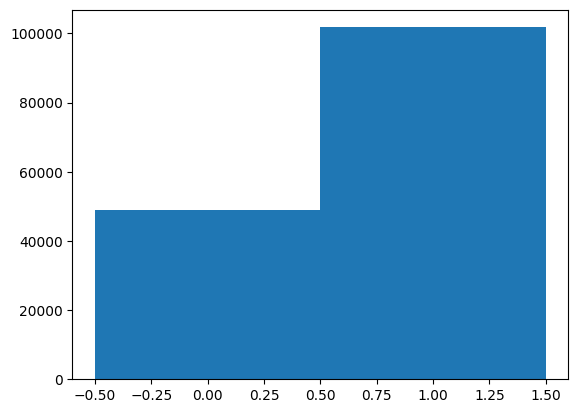

In [9]:
plt.hist(Y_train, bins=range(0,3), align='left')

In [10]:
len(X_train), len(X_test), len(X_validate)

(150858, 18971, 18793)

In [11]:
X_train = X_train[:50000]
Y_train = Y_train[:50000]

In [12]:
batch_size = 16

train_dataset = Dataset.from_tensor_slices(
    (X_train, Y_train)
).repeat(
    count=-1
).shuffle(
    len(X_train)
).batch(
    batch_size
)

In [13]:
validation_dataset = Dataset.from_tensor_slices((X_validate, Y_validate)).batch(X_validate.shape[0])

test_dataset = Dataset.from_tensor_slices((X_test, Y_test)).batch(len(X_test))

MemoryError: Unable to allocate 585. MiB for an array with shape (18971, 40, 101) and data type float64

In [ ]:
model = Sequential([
    Conv2D(4, 3,
           padding='same',
           activation='relu',
           kernel_regularizer=regularizers.l2(0.001),
           name='conv_layer1',
           input_shape=(IMG_WIDTH, IMG_HEIGHT, 1)),
    MaxPooling2D(name='max_pooling1', pool_size=(2,2)),
    Conv2D(4, 3,
           padding='same',
           activation='relu',
           kernel_regularizer=regularizers.l2(0.001),
           name='conv_layer2'),
    MaxPooling2D(name='max_pooling2', pool_size=(2,2)),
    Flatten(),
    Dropout(0.2),
    Dense(
        40,
        activation='relu',
        kernel_regularizer=regularizers.l2(0.001),
        name='hidden_layer1'
    ),
    Dense(
        1,
        activation='sigmoid',
        kernel_regularizer=regularizers.l2(0.001),
        name='output'
    )
])
model.summary()

In [ ]:
epochs=10

model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

In [ ]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [ ]:
# Define checkpoint callback
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath="checkpoints/model_epoch_{epoch:02d}_val_acc_{val_accuracy:.2f}.h5",
    monitor='val_accuracy',
    mode='max',
    save_best_only=True,
    save_weights_only=False  # Set to True if only saving weights
)

history = model.fit(
    train_dataset,
    steps_per_epoch=len(X_train) // batch_size,
    epochs=epochs,
    validation_data=validation_dataset,
    validation_steps=1,
    callbacks=[tensorboard_callback, model_checkpoint_callback]
)

In [ ]:
model.save("trained.model")

In [ ]:
model2 =  keras.models.load_model("checkpoint.model")

In [ ]:
results = model2.evaluate(X_test, tf.cast(Y_test, tf.float32), batch_size=128)

In [ ]:
predictions = model2.predict_on_batch(X_test)
decision = [1 if p > 0.5 else 0 for p in predictions]
tf.math.confusion_matrix(Y_test, decision)

In [ ]:
predictions = model2.predict_on_batch(X_test)
decision = [1 if p > 0.9 else 0 for p in predictions]
tf.math.confusion_matrix(Y_test, decision)

In [ ]:
complete_train_X = np.concatenate((X_train, X_validate, X_test))
complete_train_Y = np.concatenate((Y_train, Y_validate, Y_test))

complete_train_dataset = Dataset.from_tensor_slices((complete_train_X, complete_train_Y)).repeat(count=-1).shuffle(300000).batch(batch_size)

In [ ]:
history = model2.fit(
    complete_train_dataset,
    steps_per_epoch=len(complete_train_X) // batch_size,
    epochs=5
)

In [ ]:
predictions = model2.predict_on_batch(complete_train_X)
decision = [1 if p > 0.5 else 0 for p in predictions]
tf.math.confusion_matrix(complete_train_Y, decision)

In [ ]:
decision = [1 if p > 0.95 else 0 for p in predictions]
tf.math.confusion_matrix(complete_train_Y, decision)

In [ ]:
model2.save("fully_trained.model")